In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
idw_apply_df = pd.read_csv("./datasets/idw_datasets/idw_apply_aws.csv", index_col = 0); aws_df = pd.read_csv("./datasets/idw_datasets/aws.csv", index_col = 0); 
idw_df = pd.read_csv("./datasets/idw_datasets/idw.csv", index_col = 0); pm_df = pd.read_csv("./datasets/idw_datasets/pm_result.csv", index_col = 0); 
idw_apply_df.index = pd.to_datetime(idw_apply_df.index); aws_df.index = pd.to_datetime(aws_df.index) 
idw_df.index = pd.to_datetime(idw_df.index); pm_df.index = pd.to_datetime(pm_df.index)

# set columns name
kind_1 = "IDW"; kind_2 = "AWS"
idw_apply_df_columns_list = [f"{kind_1} Air Temperature", f"{kind_1} U-Component", f"{kind_1} V-Component", 
                             f"{kind_1} Wind Direction", f"{kind_1} Wind Speed", f"{kind_1} Humidity", 
                             f"{kind_1} Visibility", f"{kind_1} WW", ]
aws_df_columns_list = [f"{kind_2} Air Temperature", f"{kind_2} U-Component", f"{kind_2} V-Component", 
                       f"{kind_2} Wind Direction", f"{kind_2} Wind Speed", f"{kind_2} Humidity", 
                       f"{kind_2} Visibility",]
idw_df_columns_list = [f"{kind_1} Air Temperature", f"{kind_1} U-Component", f"{kind_1} V-Component", 
                       f"{kind_1} Wind Direction", f"{kind_1} Wind Speed", f"{kind_1} Humidity", 
                       f"{kind_1} Visibility",]
idw_apply_df.columns = idw_apply_df_columns_list
aws_df.columns = aws_df_columns_list; idw_df.columns = idw_df_columns_list; 

total_df = pd.concat([idw_df, aws_df], axis=1)

In [3]:
# Calculate Corr
kind_1 = "IDW"; kind_2 = "AWS"; 
target_list = ['Air Temperature', 'U-Component', 'V-Component', 'Wind Speed', 'Humidity', 'Visibility', ]
corr_list = []
for target in target_list:
    temp_ = total_df[[f'{kind_1} {target}', f'{kind_2} {target}',]]
    corr_list.append(temp_.corr().iloc[0,1])
    
corr_df = pd.DataFrame(corr_list, index = target_list, columns = ["R"])

total_df = pd.concat([idw_apply_df, pm_df[['IDW Apply']]], axis=1)
total_df.drop(['IDW Wind Direction', 'IDW WW'], axis=1, inplace = True)
total_df['DOY'] = total_df.index.dayofyear

total_df.columns = ['Air Temperature', 'U-Component', ' V-Component', 'Wind Speed', 'Humidity', 'Visibility', 'PM', 'DOY', ]
total_df = total_df[['DOY', 'Air Temperature', 'U-Component', ' V-Component', 'Wind Speed', 'Humidity', 'PM', 'Visibility', ]]

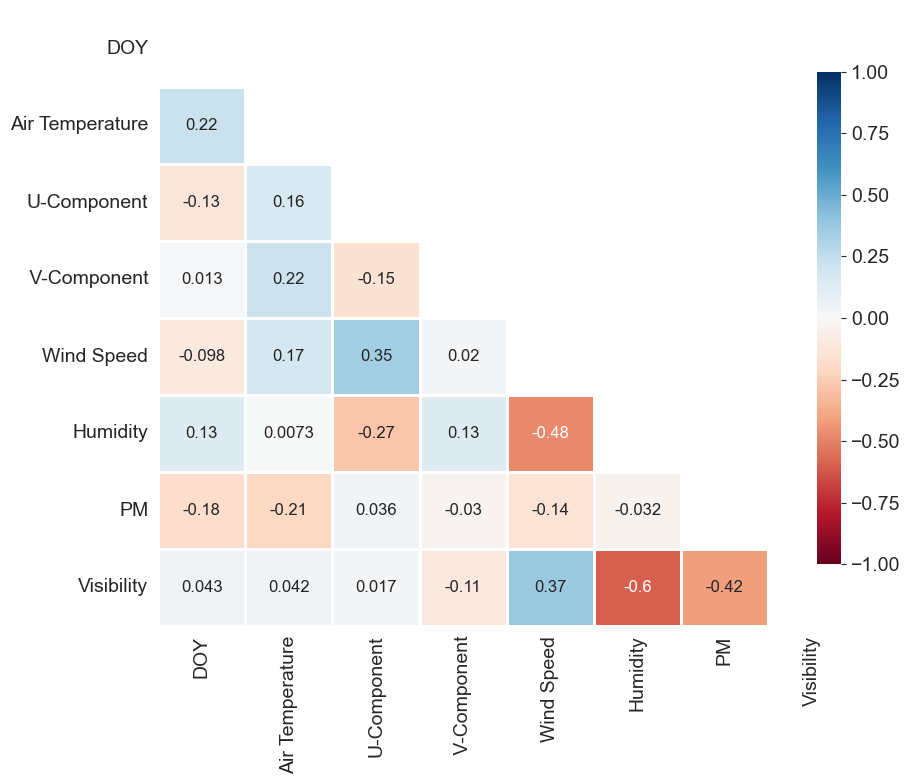

In [4]:
# Make mask
mask = np.zeros_like(total_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Corr Heatmap
plt.rcParams["figure.figsize"] = (10, 8)  # figure size 설정
plt.rcParams["font.size"] = 14  # fontsize 설정
plt.title('')
cmap="RdBu"#sns.cubehelix_palette(20, light=0.95, dark=0.15)
sns.heatmap(total_df.corr(), annot=True, annot_kws={'fontsize':12},linewidths=1, cmap = cmap, mask=mask, cbar_kws={"shrink": 0.8, 'pad': -0.05,'location':"right"}, vmin = -1, vmax = 1)
plt.grid(False)
plt.savefig("./result/data_heatmap.png", bbox_inches='tight', dpi = 500)
plt.show()